In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import csv
import os, sys
from latexifypaper import *
from csv_plot import *
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
from matplotlib import gridspec

In [9]:
def plot_figure_with_error_bar(names, data, color_list):
    '''
    each column of data is a line
    the name follows the pattern like ['fp Nystrom-x', 'fp Nystrom-y', 'fp Nystrom-y_std', 'fp RFF-x', 'fp RFF-y', 'fp RFF-y_std']
    '''
    marker_list = ['o', 'v', '^', 's', 'h', 'd', '+']
    for i in range(data.shape[1] // 3):
        idx = i * 3
        label = names[idx].split("|")[0]
        print "label ", names[idx], label
        x = data[:, idx]
        average_y = data[:, idx + 1]
        std_y = data[:, idx + 2]
#         print x, average_y, std_y
        plt.errorbar(x, average_y, yerr=std_y, label=label, marker=marker_list[i], markeredgecolor=color_list[i % len(color_list)], fmt="-o", linewidth=1, capsize=3.5, capthick=1, color=color_list[i % len(color_list)])

In [10]:
csv_file_name = "/Users/Jian/Data/research/lp_kernel/lp_kernel/paper/data_for_plot/timit_error_vs_n_feat_lm_halp.csv"

In [11]:
groups, names, data = csv_to_table(csv_file_name)
names = names[1:]
print groups
print names
# print data.shape
# print data[:, 0], data[:, 1], data[:, 2]

['FP-SGD|x', 'FP-SGD|y', 'FP-SGD|y_std', '8-bit LM-HALP|x', '8-bit LM-HALP|y', '8-bit LM-HALP|y_std']
['1', '2', '3', '4', '5', '6', '7', '8']


In [12]:
label_font=14
legend_font = 13

In [13]:
def plot_figure_with_error_bar(names, data, color_list):
    '''
    each column of data is a line
    the name follows the pattern like ['fp Nystrom-x', 'fp Nystrom-y', 'fp Nystrom-y_std', 'fp RFF-x', 'fp RFF-y', 'fp RFF-y_std']
    '''
    marker_list = ['s', 'o', 'o', 's', '+', 'v', 'h']    
    for i in range(data.shape[1] // 3):
        idx = i * 3
        label = names[idx].split("|")[0]
        print "label ", names[idx], label
        x = data[:, idx]
        average_y = data[:, idx + 1]
        std_y = data[:, idx + 2]
#         print x, average_y, std_y
#         plt.errorbar(x, average_y, yerr=std_y, label=label, marker=marker_list[i], markeredgecolor=color_list[i % len(color_list)], fmt="-o", linewidth=1, capsize=3.5, capthick=1, color=color_list[i % len(color_list)])
        if "LM" in label:
#             plt.plot(x, average_y, "--", markerfacecolor="none", markersize=8, markeredgewidth=1.5, label=r"$\lambda$="+label, marker=marker_list[i], markeredgecolor=color_list[i % len(color_list)], fmt="-o", linewidth=1, capsize=5, capthick=1, color=color_list[i % len(color_list)])
            plt.plot(x, average_y, "--", label=label, markerfacecolor="none", markeredgewidth=1.5, marker=marker_list[i], markeredgecolor=color_list[i % len(color_list)], linewidth=1, color=color_list[i % len(color_list)])
        else:
            plt.plot(x, average_y, "-", label=label, markerfacecolor="none", markeredgewidth=1.5, marker=marker_list[i], markeredgecolor=color_list[i % len(color_list)], linewidth=1, color=color_list[i % len(color_list)])

label  FP-SGD|x FP-SGD
label  8-bit LM-HALP|x 8-bit LM-HALP


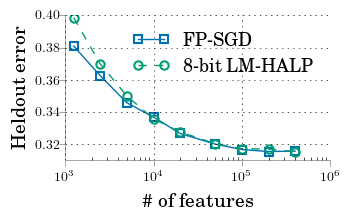

In [14]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
latexify(columns=1)
plt.figure()
fig = plt.figure(figsize=[3.6, 2.3])
ax = plt.subplot(111)
plot_figure_with_error_bar(groups, data[:, :12], colors)
plt.grid()
# plt.yscale("log")
plt.xscale("log")
# plt.xlim([None, 4e1])
plt.xlabel("\# of features", fontsize=label_font)
plt.ylabel("Heldout error", fontsize=label_font)
leg=plt.legend(framealpha=0.2, fontsize=legend_font)
leg.get_frame().set_linewidth(0.0)
format_axes(ax)
plt.tight_layout()
plt.savefig("../figures/timit_error_vs_n_feat_lm_halp.pdf")
plt.show()